In [5]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from PIL import Image
from matplotlib import cm
from matplotlib.colors import Normalize
import random
from mayavi import mlab

# Escape-Time fractal

In [127]:
def fractale(x_limit=(-1,1), y_limit=(-1,1), size=1000, itermax=30, c=[0.3,0.5], mode='mandelbrot', color='color'):
    # initialization
    x_min, x_max = x_limit
    y_min, y_max = y_limit
    M = np.zeros((size,size))
    x_step = (x_max - x_min)/size
    y_step = (y_max - y_min)/size
    # loop on all pixel
    for i in tqdm(range(size)):
        for j in range(size):
            n_iter = 0
            if mode=='mandelbrot':
                c_reel = i * x_step + x_min
                c_imag = j * y_step + y_min
                z_reel = 0
                z_imag = 0
            elif mode=='julia':
                c_reel = c[0]
                c_imag = c[1]
                z_reel = i * x_step + x_min
                z_imag = j * y_step + y_min
            else:
                return 0
            while (z_reel**2 + z_imag**2 < 4) and (n_iter < itermax):
                z_reel, z_imag = z_reel**2 - z_imag**2 + c_reel, 2*z_imag*z_reel + c_imag
                n_iter = n_iter + 1
            if color=='binary':
                M[j,i] = n_iter > itermax
            else:
                M[j,i] = n_iter/itermax
    return M

In [99]:
def display(image, c, x_limit=(-1,1), y_limit=(-1,1), cmap='binary_r', save=False, mode="mandelbrot", cmap_object=None):
    x_min, x_max = x_limit
    y_min, y_max = y_limit
    plt.imshow(image, cmap=cmap)
    plt.xticks(()), plt.yticks(())
    if save:
        image *= 1.0/image.max() 
        plt.imsave('images/'+mode+'_c_'+str(c[0])+'_'+str(c[1])+'_cmap_'+cmap+'_X_'+str(x_min)+'_to_'+str(x_max)+'_Y_'+str(y_min)+'_to_'+str(y_max)+'.png', cmap_object(image))

## Mandelbrot

In [148]:
image_m = fractale(x_limit, y_limit, itermax=100, size=1000, color='color', mode='mandelbrot')

100%|████████████████████████████████████████████████████| 1000/1000 [00:50<00:00, 19.97it/s]


<IPython.core.display.Javascript object>


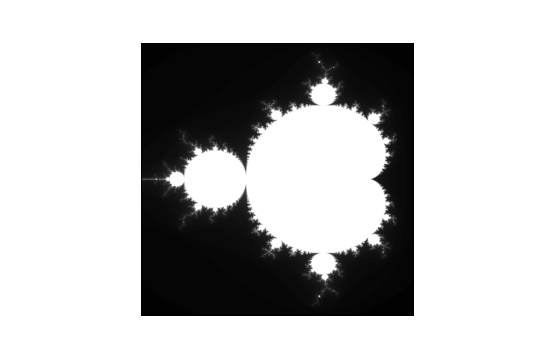

In [150]:
display(image_m, x_limit, y_limit, cmap='binary_r', save=True, mode='mandelbrot', cmap_object=cm.binary_r)

In [124]:
x_limit = -1.6, 0.6
y_limit = -1.2, 1.2
image_m = fractale(x_limit, y_limit, itermax=50, size=1000, mode='mandelbrot')

100%|████████████████████████████████████████████████████| 1000/1000 [00:33<00:00, 30.16it/s]


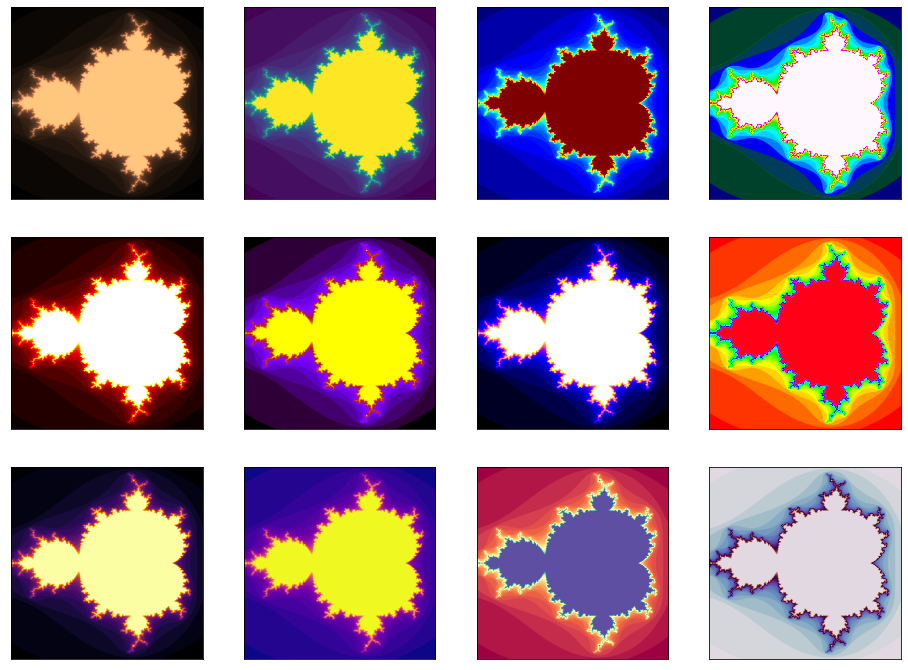

In [45]:
cmap = 'copper', 'viridis', 'jet', 'gist_ncar', 'hot', 'gnuplot', 'gnuplot2', 'hsv', 'inferno', 'plasma', 'Spectral', 'twilight', 'cool'
plt.figure(figsize=(16,12))
for i in range(12):
    plt.subplot(3,4,i+1)
    display(image_m, x_limit, y_limit, cmap=cmap[i], save=False, mode='mandelbrot')
plt.show()

### Save figures for multiple itermax values

In [56]:
# compute fractal for all values and append it to variable
image_itermax = []
for i in tqdm(range(1,30)):
    image_itermax.append(fractale(x_limit, y_limit, size=500, itermax=i, mode='mandelbrot'))

100%|███████████████████████████████████████| 49/49 [03:36<00:00,  4.41s/it]


In [73]:
# save as gif
im = []
for i in np.hstack((np.arange(4,30),np.arange(30,4,-1))):
    im.append(Image.fromarray(image_itermax[i-1]))
im[0].save('gifs/itermax.gif', save_all=True, append_images=im[1:], optimize=True, duration=10, loop=0)

![SegmentLocal](gifs/itermax.gif "segment")

## Julia

In [47]:
x_limit = [[-1.2, 1.2], [-1.2, 1.2], [-0.1, 0.1], [-1, 1], [-1.1, 1.1]]
y_limit = [[-1.2, 1.2], [-1.2, 1.2], [-0.1, 0.1], [-1, 1], [-1.1, 1.1]]
c = [[0.3, 0.5], [0.285, 0.01], [-1.417022285618,0.0099534], [-0.8, 0.2], [0.285,0.013]]

In [89]:
image_j = []
for k, c_i in enumerate([c[0]]):
    image_j.append(fractale(x_limit[k], y_limit[k], itermax=500, c=c_i, mode='julia'))

In [65]:
cmap_object = cm.copper, cm.viridis, cm.jet, cm.gist_ncar, cm.hot, cm.gnuplot, cm.gnuplot2, cm.hsv, cm.inferno, cm.plasma, cm.Spectral, cm.twilight, cm.cool

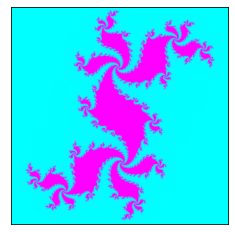

In [90]:
plt.figure(figsize=(20,45))
n = 0
for i in range(13):
    for c_i in enumerate(c):
        n = n+1
        plt.subplot(10,5,n)
        display(image_j[k], c_i, x_limit[k], y_limit[k], cmap=cmap[i], save=False, mode='julia')
plt.show()

### save figures for multiple c values

In [16]:
# discretize some complex of the plane
N = 75
r = 0.8
x = np.linspace(0,2*np.pi,N)
array = np.array([r*np.cos(x),r*np.sin(x)]).T

In [17]:
# compute fractal for all values and append it to variable
image_c = []
for i in tqdm(range(len(array))):
    image_c.append(fractale([-1.2, 1.2], [-1.2, 1.2], c=array[i], size=500, itermax=30, mode='julia'))

100%|███████████████████████████████████████| 75/75 [07:10<00:00,  5.74s/it]


In [18]:
# format figure to have cmap
im = []
cmap = cm.jet
for i in np.hstack((np.arange(len(array)),np.arange(len(array)-1,0,-1))):
    image = image_c[i]
    image *= 1.0/image.max() 
    im.append(Image.fromarray(np.uint8(255*cmap(image))))

In [20]:
# save as gif
im[0].save('gifs/multiple_c.gif', save_all=True, append_images=im[1:], optimize=True, duration=100, loop=0)

![SegmentLocal](gifs/multiple_c.gif "segment")

# Landscape fractal

In [10]:
mlab.init_notebook()

Notebook initialized with ipy backend.


In [11]:
levels = 11
size   = 2 ** (levels - 1)
height = np.zeros((size + 1, size + 1))

for lev in tqdm(range(levels)):
    step = size // 2 ** lev
    for y in range(0, size + 1, step):
        jumpover = 1 - (y // step) % 2 if lev > 0 else 0
        for x in range(step * jumpover, size + 1, step * (1 + jumpover)):
            pointer     = 1 - (x // step) % 2 + 2 * jumpover if lev > 0 else 3
            yref, xref  = step * (1 - pointer // 2), step * (1 - pointer % 2)
            corner1     = height[y - yref, x - xref]
            corner2     = height[y + yref, x + xref]
            average     = (corner1 + corner2) / 2.0
            variation   = step * (random.random() - 0.5)
            height[y,x] = average + variation if lev > 0 else 0

100%|██████████████████████████████████████████████████████████████████████████████████| 11/11 [00:03<00:00,  3.63it/s]


In [14]:
xg, yg = np.mgrid[-1:1:1j*size,-1:1:1j*size]
surf = mlab.surf(xg, yg, height, colormap='gist_earth', warp_scale='auto')
mlab.show()